# Challenge Telecom X - Parte 2

## Extracción del Archivo Tratado

In [41]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/parte2_telecom/datos_tratados_.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [42]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Eliminación de las Columnas Irrelevantes

In [43]:
print(datos.nunique().sort_values())

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
PhoneService           2
Dependents             2
PaperlessBilling       2
InternetService        3
DeviceProtection       3
TechSupport            3
OnlineSecurity         3
OnlineBackup           3
StreamingTV            3
StreamingMovies        3
Contract               3
MultipleLines          3
PaymentMethod          4
tenure                72
Cuentas_Diarias     1584
Charges.Monthly     1584
Charges.Total       6530
customerID          7032
dtype: int64


In [44]:
columnas_unicas = [col for col in datos.columns if datos[col].nunique() == 1]
print(f'Las columnas con valores únicos son: {columnas_unicas}')

Las columnas con valores únicos son: []


In [45]:
correlacion = datos.select_dtypes(include=['float64', 'int64']).corr().abs()
correlacion

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.219874
tenure,0.015683,1.000000,0.246862,0.825880,0.246862
Charges.Monthly,0.219874,0.246862,1.000000,0.651065,1.000000
Charges.Total,0.102411,0.825880,0.651065,1.000000,0.651065
Cuentas_Diarias,0.219874,0.246862,1.000000,0.651065,1.000000



cuentas_diarias y cargos_mensuales tienen la misma correlatividad, conviene eliminar cuentas_diarias.

In [46]:
df_reducido = datos.drop(columns = ['customerID', 'Cuentas_Diarias', 'PhoneService', 'Charges.Total', 'gender'])
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  Charges.Monthly   7032 non-null   float64


## Verificación de la Proporción de Cancelación (Churn)

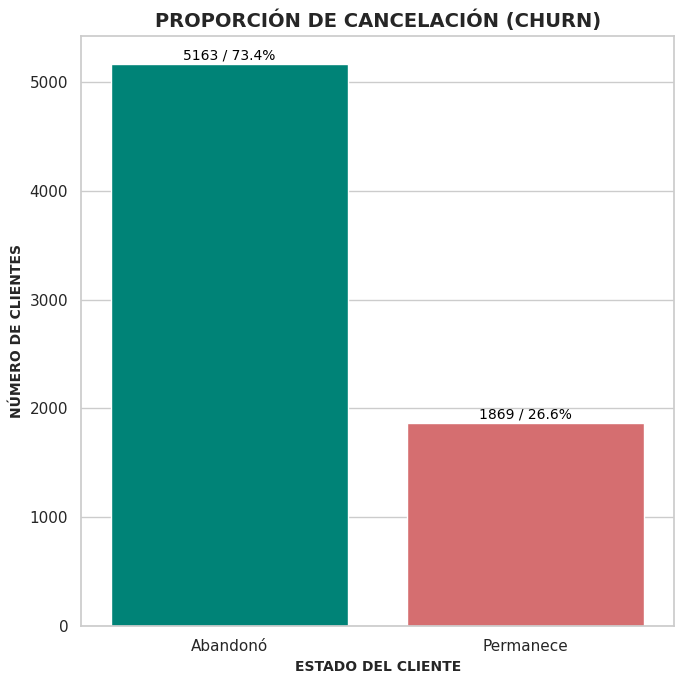

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

valores = df_reducido['Churn'].value_counts()
porcentajes = df_reducido['Churn'].value_counts(normalize=True) * 100

df_aux = df_reducido['Churn'].map({ "Yes": 'Permanece', "No": 'Abandonó'}).to_frame(name='Estado')
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
colores = ['#008377', '#d56e70']

ax = sns.countplot(x='Estado', data=df_aux, color=None)
for patch, color in zip(ax.patches, colores):
    patch.set_facecolor(color)

plt.title('PROPORCIÓN DE CANCELACIÓN (CHURN)', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('ESTADO DEL CLIENTE', fontsize=10, fontweight='bold')
plt.ylabel('NÚMERO DE CLIENTES', fontsize=10, fontweight='bold')

for p in ax.patches:
    cantidad = int(p.get_height())
    porcentaje = cantidad / len(df_reducido['Churn']) * 100
    ax.annotate(f'{cantidad} / {porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.show()

## Análisis de Correlación

In [48]:
df_corr = df_reducido.select_dtypes(include=['float64', 'int64']).corr().abs()

In [49]:

import plotly.express as px

fig = px.imshow(
    df_corr,
    text_auto=".2f",
    color_continuous_scale="viridis",
    aspect="auto",
    title="MATRIZ DE CORRELACION"
)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40))
fig.show()


El predictor más fuerte es tenure (0.25), que muestra una correlación moderada con Charges.Monthly. Esto sugiere que clientes con contratos más largos tienden a tener cargos mensuales más altos.

Otras correlaciones relevantes:



*   SeniorCitizen y Charges.Monthly (0.22): indica que ciudadanos mayores tienen ligeramente mayor tendencia a tener cargos mensuales elevados.
*   SeniorCitizen y tenure (0.02): casi nula, lo que significa que la edad avanzada no influye significativamente en la antigüedad del contrato.


## Análisis Dirigido

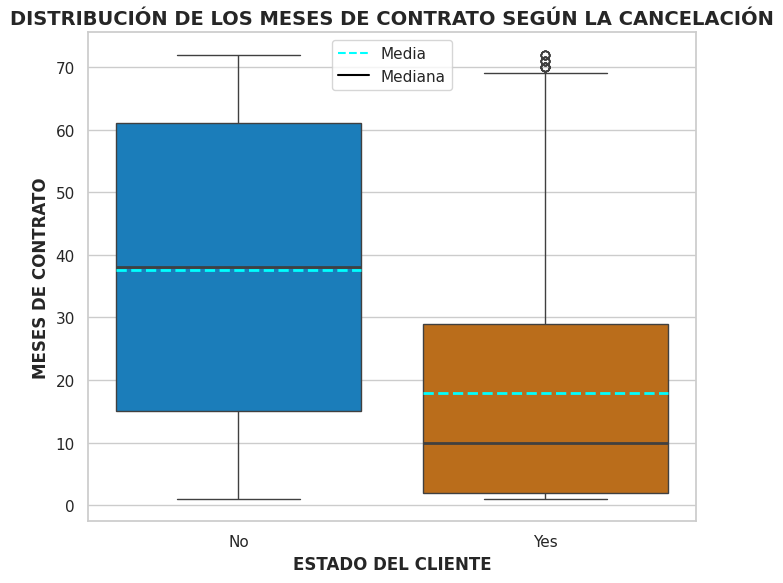

In [50]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='Churn',
    y='tenure', # Corrected column name based on df_reducido.info()
    hue='Churn',
    palette={"No": '#0083d5', "Yes": '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('Churn')):
    ax.hlines(
        y=group['tenure'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS MESES DE CONTRATO SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("MESES DE CONTRATO", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

El gráfico muestra una relación clara entre el tiempo de contrato (tenure) y la probabilidad de cancelación (Churn):


*   Grupo No (sin cancelación):
Mediana ≈ 38 meses (ligeramente superior a la media). Rango amplio (1–70+ meses), indicando diversidad en la permanencia.
La mayoría de clientes leales tienen contratos prolongados.





*   Grupo Yes (con cancelación):
Mediana entre 10–12 meses, media ≈ 19–20 meses (media > mediana).
Contratos más cortos, con pocos outliers.


Clientes con mayor antigüedad tienden a menor probabilidad de cancelar, lo que sugiere que estrategias de fidelización a largo plazo podrían reducir la tasa de churn. La dispersión en el grupo No refleja una base de clientes estable, mientras que el grupo que cancelan concentra casos de baja permanencia.

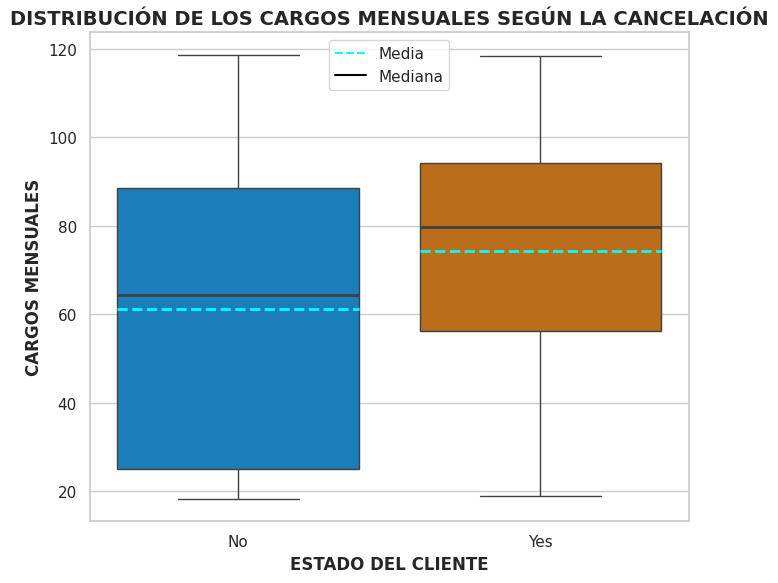

In [51]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='Churn',
    y='Charges.Monthly',
    hue='Churn',
    palette={"No": '#0083d5', "Yes": '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('Churn')):
    ax.hlines(
        y=group['Charges.Monthly'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS CARGOS MENSUALES SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("CARGOS MENSUALES", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

El análisis de MonthlyCharges según Churn revela una relación inversa: clientes que cancelaron (Yes) tienen cargos mensuales más altos (mediana ≈80, media ≈75) comparado con quienes no cancelaron (No, mediana ≈65, media ≈62). Aunque el grupo "No" muestra una distribución amplia pero con valores relativamente bajos, el grupo que "Si" concentra mayores montos, sugiriendo que clientes con cargos elevados tienden a abandonar el servicio. Esto podría reflejar una percepción de costo excesivo o insatisfacción con el valor ofrecido, destacando la necesidad de revisar estrategias de precios o beneficios para retener a clientes con altos pagos.

## Separación de los Datos

In [52]:
df_reducido.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly'],
      dtype='object')

In [53]:
df_reducido

,Churn,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,0,Yes,Yes,9,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,No,0,No,No,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,Yes,0,No,No,4,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,Yes,1,Yes,No,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,Yes,1,Yes,No,3,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,0,No,No,13,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7028,Yes,0,Yes,No,22,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7029,No,0,No,No,2,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7030,No,0,Yes,Yes,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


In [54]:
X = df_reducido.drop('Churn', axis = 1)
y = df_reducido['Churn']

In [55]:
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,0,Yes,Yes,9,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,0,No,No,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,0,No,No,4,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,1,Yes,No,13,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,1,Yes,No,3,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,No,No,13,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7028,0,Yes,No,22,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7029,0,No,No,2,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7030,0,Yes,Yes,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


In [56]:
y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7027,No
7028,Yes
7029,No
7030,No


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)

columnas_categoricas = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_numericas = ['tenure', 'Charges.Monthly']

## Encoding

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
one_hot = make_column_transformer((OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columnas_categoricas), (StandardScaler(), columnas_numericas), remainder='passthrough', sparse_threshold=0)


In [60]:
X_train_encoded = one_hot.fit_transform(X_train)
X_test_encoded = one_hot.transform(X_test)

In [61]:
one_hot.get_feature_names_out()

array(['onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 

In [62]:
X_train_df = pd.DataFrame(X_train_encoded, columns = one_hot.get_feature_names_out())
X_train_df

,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,standardscaler__tenure,standardscaler__Charges.Monthly,remainder__SeniorCitizen
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.541067,0.837322,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.233499,0.177040,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.517947,1.293033,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.536229,-1.496118,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.029843,-1.017123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.495498,0.556244,0.0
6324,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.378142,-1.501108,0.0
6325,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.459605,0.308431,0.0
6326,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.029843,-0.481579,0.0


In [63]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__Partner_No                               6328 non-null   float64
 1   onehotencoder__Partner_Yes                              6328 non-null   float64
 2   onehotencoder__Dependents_No                            6328 non-null   float64
 3   onehotencoder__Dependents_Yes                           6328 non-null   float64
 4   onehotencoder__MultipleLines_No                         6328 non-null   float64
 5   onehotencoder__MultipleLines_No phone service           6328 non-null   float64
 6   onehotencoder__MultipleLines_Yes                        6328 non-null   float64
 7   onehotencoder__InternetService_DSL                      6328 non-null   float64
 8   onehotencoder__InternetService_Fiber o

In [64]:
X_test_df = pd.DataFrame(X_test_encoded, columns=one_hot.get_feature_names_out())
X_test_df

,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,standardscaler__tenure,standardscaler__Charges.Monthly,remainder__SeniorCitizen
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.251110,0.363316,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.047454,-1.472834,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.296679,1.010292,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.337411,0.857280,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.314290,-0.340209,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.843797,1.346254,0.0
700,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.274231,-0.466610,0.0
701,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.152037,-0.533138,1.0
702,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.373304,1.524214,1.0


In [65]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__Partner_No                               704 non-null    float64
 1   onehotencoder__Partner_Yes                              704 non-null    float64
 2   onehotencoder__Dependents_No                            704 non-null    float64
 3   onehotencoder__Dependents_Yes                           704 non-null    float64
 4   onehotencoder__MultipleLines_No                         704 non-null    float64
 5   onehotencoder__MultipleLines_No phone service           704 non-null    float64
 6   onehotencoder__MultipleLines_Yes                        704 non-null    float64
 7   onehotencoder__InternetService_DSL                      704 non-null    float64
 8   onehotencoder__InternetService_Fiber opt

In [66]:
X_train_corr = X_train_df.copy()
X_train_corr['Churn'] = y_train.reset_index(drop=True).map({'Yes': 1, 'No': 0})

correlaciones = X_train_corr.corr()['Churn'].sort_values(ascending=False)
print(correlaciones)

Churn                                                     1.000000
onehotencoder__Contract_Month-to-month                    0.407733
onehotencoder__OnlineSecurity_No                          0.342980
onehotencoder__TechSupport_No                             0.339736
onehotencoder__InternetService_Fiber optic                0.313586
onehotencoder__PaymentMethod_Electronic check             0.307604
onehotencoder__OnlineBackup_No                            0.266649
onehotencoder__DeviceProtection_No                        0.252638
standardscaler__Charges.Monthly                           0.197618
onehotencoder__PaperlessBilling_Yes                       0.195845
onehotencoder__Dependents_No                              0.159641
remainder__SeniorCitizen                                  0.155541
onehotencoder__Partner_No                                 0.150653
onehotencoder__StreamingMovies_No                         0.132361
onehotencoder__StreamingTV_No                             0.12

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = RFECV(estimator=modelo_l1, step=1, cv=5, scoring='accuracy')
selector.fit(X_train_df, y_train)

selected_features = X_train_df.columns[selector.support_]
print("Número óptimo de variables:", selector.n_features_)

Número óptimo de variables: 22


In [68]:
from sklearn.feature_selection import RFE

modelo_base = LogisticRegression(penalty='l1', solver='liblinear', C = 10, random_state=42)
selector = RFE(estimator=modelo_base, n_features_to_select=29)

selector.fit(X_train_df, y_train)
selected_features_mask = selector.support_
selected_features = X_train_df.columns[selected_features_mask]

X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

print("Las variables seleccionadas son:")
print(selected_features)

Las variables seleccionadas son:
Index(['onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_No internet service',
       'onehotenco

## Balanceo de las Clases

In [69]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_selected, y_train)

print("Distribución original:", Counter(y))
print("Distribución del entrenamiento antes del balanceo:", Counter(y_train))
print("Distribución del entrenamiento balanceado:", Counter(y_train_bal))

counter = Counter(y_train_bal)
if len(set(counter.values())) == 1:
    print("Las clases están perfectamente balanceadas.")
else:
    print("Las clases NO están balanceadas perfectamente.")

Distribución original: Counter({'No': 5163, 'Yes': 1869})
Distribución del entrenamiento antes del balanceo: Counter({'No': 4646, 'Yes': 1682})
Distribución del entrenamiento balanceado: Counter({'No': 4646, 'Yes': 4646})
Las clases están perfectamente balanceadas.


## Creación y Evaluación de los Modelos

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluar_modelo(y_test, y_pred):
  print("Resultados para el modelo:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred, pos_label='Yes'):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred, pos_label='Yes'):.2f}")
  print(f"F1: {f1_score(y_test, y_pred, pos_label='Yes'):.2f}")

In [71]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    penalty='l2',
    C=10,
    class_weight= 'balanced',
    solver='liblinear',
    max_iter=5000,
    random_state=42
)

modelo.fit(X_train_bal, y_train_bal)
y_modelo_lr = modelo.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_lr)


Resultados para el modelo:
Accuracy: 0.75
Precision: 0.52
Recall: 0.73
F1: 0.60


In [72]:
from sklearn.ensemble import RandomForestClassifier

modelo2 = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo2.fit(X_train_bal, y_train_bal)
y_modelo_rf = modelo2.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_rf)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.50
Recall: 0.71
F1: 0.59


In [73]:
from sklearn.ensemble import GradientBoostingClassifier

modelo3 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo3.fit(X_train_bal, y_train_bal)
y_modelo_gb = modelo3.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_gb)

Resultados para el modelo:
Accuracy: 0.75
Precision: 0.52
Recall: 0.73
F1: 0.60


In [74]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo_voto = VotingClassifier(estimators=[('rf', modelo_rf), ('gb', modelo_gb)],voting='soft')
modelo_voto.fit(X_train_bal, y_train_bal)
y_proba = modelo_voto.predict_proba(X_test_selected)[:, 1]
umbral = 0.45
y_pred_int = (y_proba >= umbral).astype(int)

y_pred = np.where(y_pred_int == 1, 'Yes', 'No')

evaluar_modelo(y_test, y_pred)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.51
Recall: 0.79
F1: 0.62


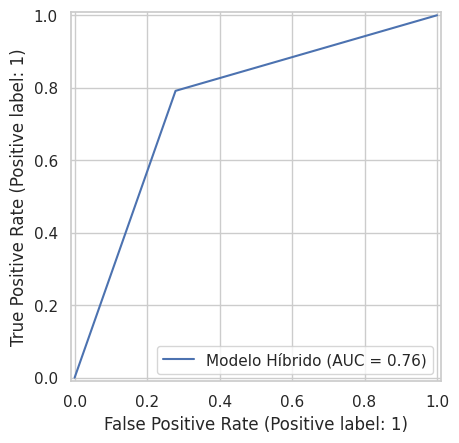

In [75]:
from sklearn.metrics import RocCurveDisplay
import numpy as np

y_test_numeric = np.where(y_test == 'Yes', 1, 0)
y_pred_numeric = np.where(y_pred == 'Yes', 1, 0)

RocCurveDisplay.from_predictions(y_test_numeric, y_pred_numeric, name = 'Modelo Híbrido');

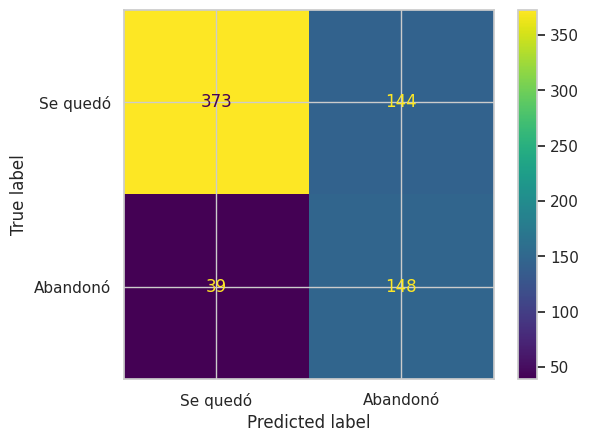

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusion = confusion_matrix(y_test, y_pred)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Se quedó', 'Abandonó'])
visualizacion_matriz.plot();


## Análisis de la Importancia de las Variables

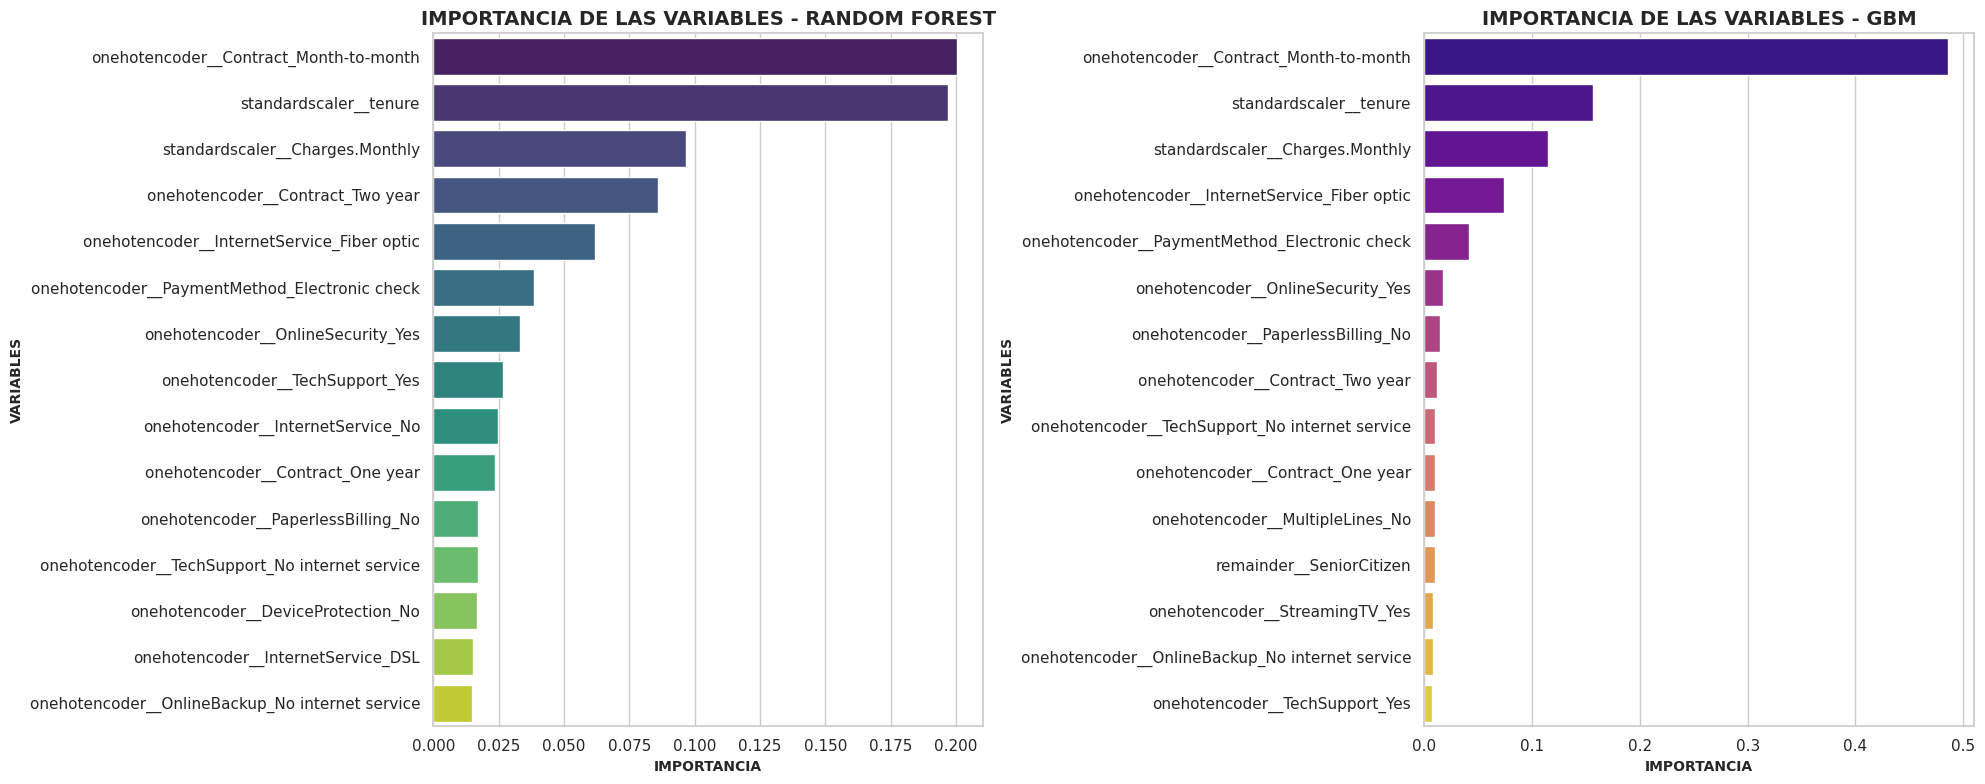

In [77]:
rf_importance = modelo2.feature_importances_
gb_importance = modelo3.feature_importances_

feature_names = X_train_selected.columns
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'RandomForest': rf_importance,
    'GBM': gb_importance
})

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
rf_plot_data = importance_df.sort_values('RandomForest', ascending=False).head(15)
sns.barplot(x='RandomForest', y='Variable', data=rf_plot_data, ax=axes[0], palette='viridis', hue='Variable', legend=False)
axes[0].set_title('IMPORTANCIA DE LAS VARIABLES - RANDOM FOREST', fontsize=14, fontweight='bold')
axes[0].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[0].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

gbm_plot_data = importance_df.sort_values('GBM', ascending=False).head(15)
sns.barplot(x='GBM', y='Variable', data=gbm_plot_data, ax=axes[1], palette='plasma', hue='Variable', legend=False)
axes[1].set_title('IMPORTANCIA DE LAS VARIABLES - GBM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[1].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [78]:
comparison_table = importance_df.sort_values(by='RandomForest', ascending=False).reset_index(drop=True).head(15)
print("TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES")
print("-" * 50)
print(comparison_table)


TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES
--------------------------------------------------
                                           Variable  RandomForest       GBM
0            onehotencoder__Contract_Month-to-month      0.200281  0.485790
1                            standardscaler__tenure      0.196809  0.156144
2                   standardscaler__Charges.Monthly      0.096846  0.114845
3                  onehotencoder__Contract_Two year      0.086011  0.011815
4        onehotencoder__InternetService_Fiber optic      0.061898  0.074234
5     onehotencoder__PaymentMethod_Electronic check      0.038352  0.041834
6                 onehotencoder__OnlineSecurity_Yes      0.033296  0.016868
7                    onehotencoder__TechSupport_Yes      0.026492  0.007151
8                 onehotencoder__InternetService_No      0.024592  0.004928
9                  onehotencoder__Contract_One year      0.023648  0.010049
10               onehotencoder__PaperlessBilling_No      0.0

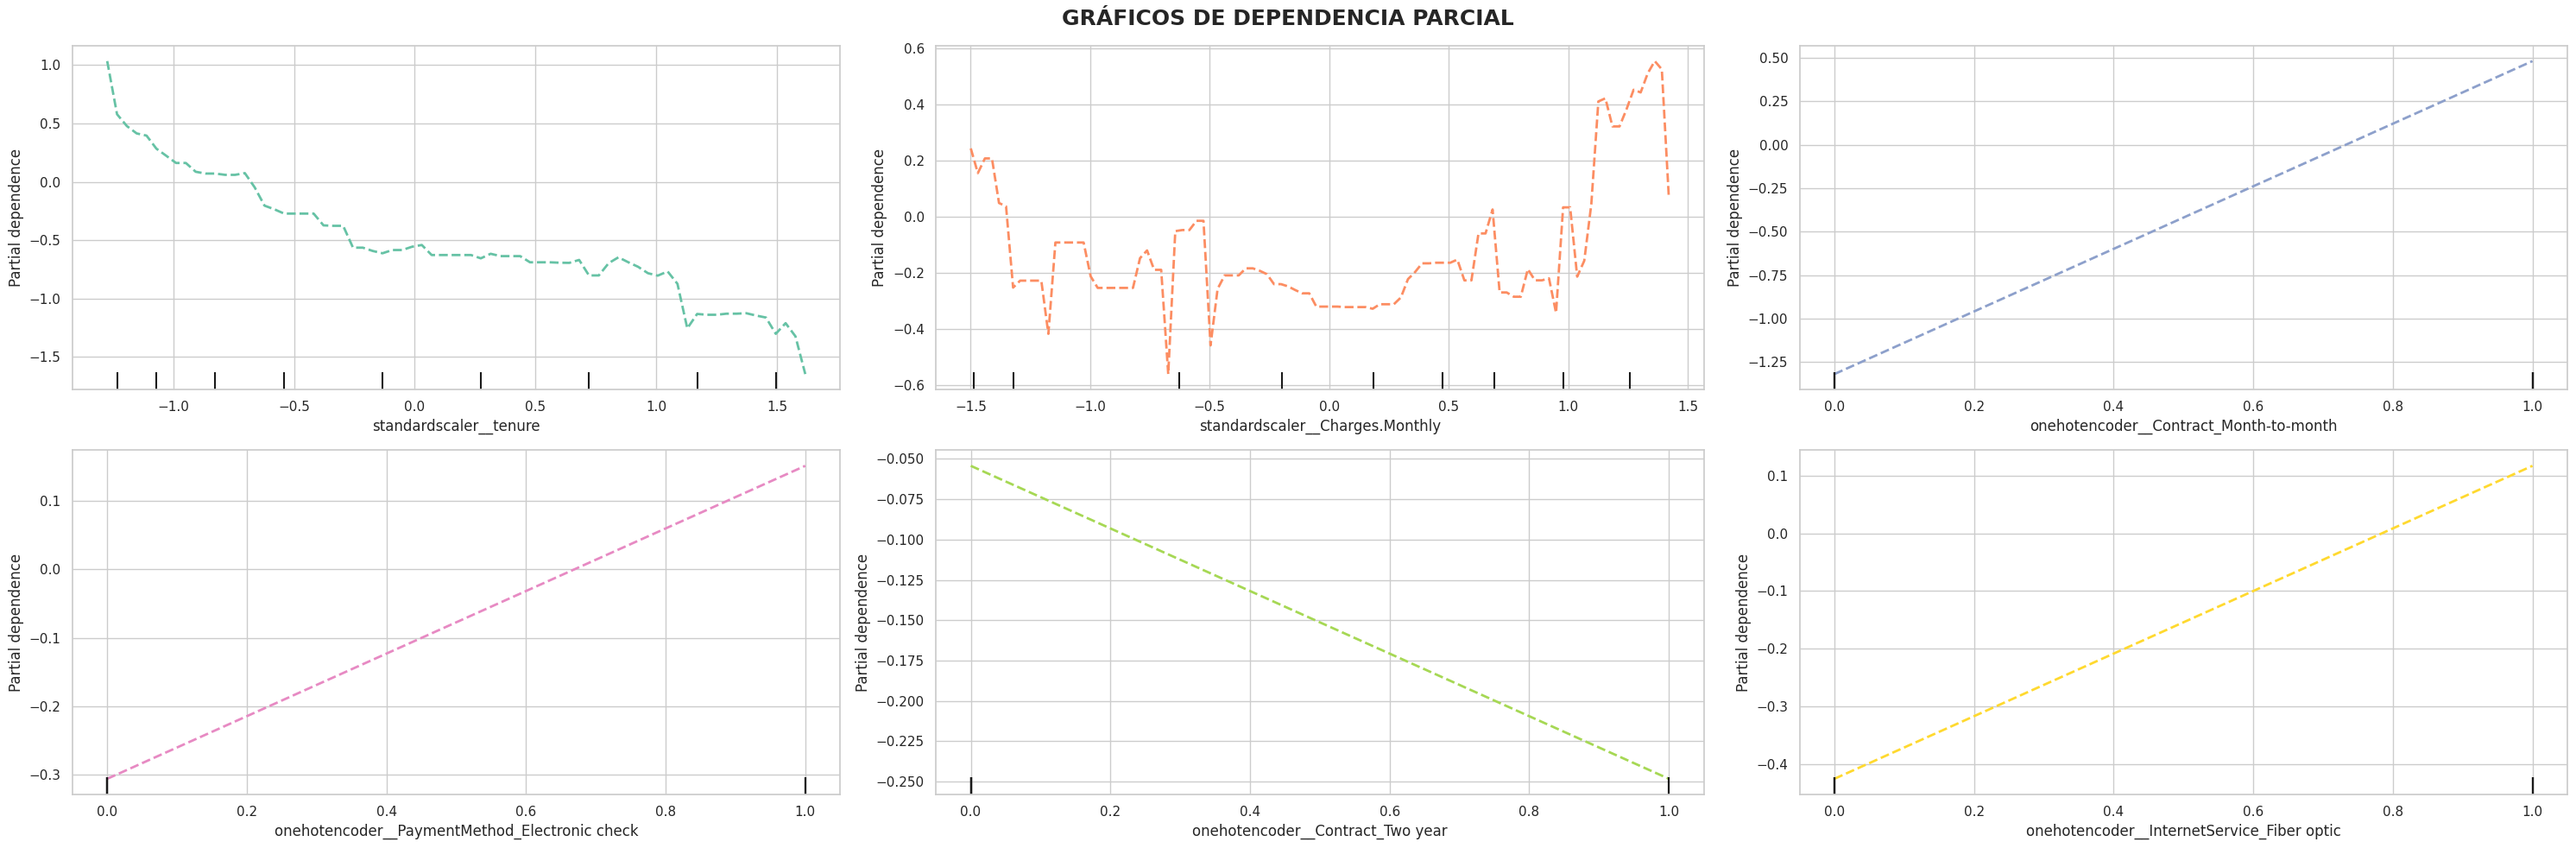

In [79]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Corrected feature names based on one_hot.get_feature_names_out()
features_to_plot = [
    'standardscaler__tenure',
    'standardscaler__Charges.Monthly',
    'onehotencoder__Contract_Month-to-month',
    'onehotencoder__PaymentMethod_Electronic check',
    'onehotencoder__Contract_Two year',
    'onehotencoder__InternetService_Fiber optic'
]

fig, axs = plt.subplots(2, 3, figsize=(30, 10))
palette = sns.color_palette("Set2", len(features_to_plot))
line_kw_list = [{"color": c, "linewidth": 2, "linestyle": "--"} for c in palette]
fig.suptitle('GRÁFICOS DE DEPENDENCIA PARCIAL', fontsize=18, fontweight='bold')

for i, feature in enumerate(features_to_plot):
    ax = axs.ravel()[i]

    PartialDependenceDisplay.from_estimator(
        modelo3,
        X_train_selected,
        [feature],
        ax=ax,
        kind='average',
        grid_resolution=100,
        line_kw=line_kw_list[i]
    )

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Conclusión - Informe de prediccion de abandono

En la segunda etapa del proyecto sobre cancelaciones en Telecom X se desarrolló un pipeline completo para detectar clientes con riesgo de churn, extraer los factores explicativos y proponer medidas operativas. El trabajo parte del dataset ya preprocesado, incluye codificación y balanceo de clases, selección de variables y la comparación entre varios clasificadores para obtener un modelo de producción.

**Objetivos del análisis**



1.   Construir modelos predictivos capaces de identificar clientes con alta probabilidad de cancelar.
2.   Detectar y cuantificar las variables que más impactan el churn.
3.   Proponer acciones concretas de retención priorizadas por impacto esperado.



**Flujo del analisis**

*  Se eliminó ruido y columnas irrelevantes y se trabajó sobre un df_reducido.

*  Separación entrenamiento/prueba estratificada y encoding: OneHot para categóricas y StandardScaler para las numéricas (tenure y Charges.Monthly).

*  Selección de variables mediante RFECV y RFE (se eligieron ~29 variables para el modelo final).

*  Balanceo del conjunto de entrenamiento con RandomOverSampler.

*  Modelado con Regresión Logística, Random Forest y Gradient Boosting; además se construyó un ensamble por votación (voting ‘soft’) y se aplicó un umbral de decisión de 0.45 para clasificar probabilidades.

*  Evaluación con métricas clásicas (accuracy, precision, recall, F1) y análisis de ROC y matriz de confusión.




**Hallazgos principales**

*  Antigüedad (tenure): surge como el predictor individual más relevante (correlación ≈ 0.25 respecto a variables clave) y muestra la relación más consistente con churn: clientes con pocos meses de contrato concentran la mayoría de las cancelaciones; la mediana del grupo que cancela está entre aproximadamente 10 a 12 meses mientras que el grupo que permanece muestra medianas mucho mayores (~38 meses). Esto apunta a que la estabilidad contractual es el factor más determinante.

*  Cargos mensuales (Charges.Monthly): los usuarios que cancelaron presentan cargos mensuales más altos en promedio (mediana ≈ 80 vs ≈ 65 para quienes se quedan), lo que sugiere una percepción de precio/valor que favorece la fuga entre los cargos elevados. Este efecto es complejo y depende de interacciones (por ejemplo, contrato corto vs largo).

*  Método de pago y servicio: variables categóricas como PaymentMethod = Electronic check y InternetService = Fiber optic aparecen entre las características monitoreadas en los PDP y en la selección final, indicando que pago por cheque electrónico y ser cliente de fibra están asociados a mayor riesgo en los modelos.

*  Perfil demográfico: SeniorCitizen muestra una correlación ligera con cargos mensuales (≈0.22), pero no influye fuertemente en tenure; su rol es secundario frente a los factores contractuales y económicos.

* **Consenso entre modelos**: Random Forest y GBM ofrecen distribuciones de importancia variable diferentes, pero coinciden en las variables top (tenure, métodos de pago, tipo de contrato/servicio), lo que refuerza la robustez del hallazgo.

**Recomendaciones**

1. **Migración proactiva de contratos “mes a mes” con pricing diferenciado:**
Combinar la estrategia de pasar clientes de alto riesgo a contratos de 1 o 2 años con una política de precios segmentada. Ofrecer incentivos económicos (descuentos temporales, meses gratis, upgrades de servicio) ajustados según el perfil:
* Para contratos cortos con cargos altos: aplicar rebajas inmediatas.

* Para contratos cortos con cargos medios/bajos: sumar beneficios de valor agregado.

2. **Optimización de métodos de pago y automatización de cobros:**
Reducir el uso de cheque electrónico (Electronic check) y fomentar medios automáticos (tarjeta/débito/transferencia) con campañas dirigidas y pequeños incentivos. Paralelamente, auditar la infraestructura de cobros para minimizar rechazos y demoras, ya que estas fricciones pueden amplificar el churn en clientes sensibles al precio o con contratos cortos.

3. **Auditoría integral de servicios críticos y seguimiento continuo:**
Realizar encuestas y análisis de reclamos para usuarios de fibra óptica, cruzando información con métricas operativas. Implementar mejoras técnicas o comerciales donde haya brechas. Integrar estos datos al sistema de scoring del modelo predictivo y reentrenarlo periódicamente para que las intervenciones de calidad tengan un reflejo directo en la reducción del riesgo.



**En conclusión:**

Lo realizado consolidó un flujo de análisis sólido que incluyó depuración de datos, selección de atributos relevantes, balanceo de clases y evaluación de modelos avanzados, lo que permitió obtener resultados muy por encima del punto de partida. La combinación de interpretabilidad y potencia predictiva permitió identificar que la permanencia contractual, el medio de pago, el tiempo como cliente y ciertos servicios específicos son los elementos más determinantes en la baja. Con estas conclusiones, la empresa cuenta con una base confiable para aplicar estrategias concretas que fortalezcan la retención y optimicen sus ofertas.